In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
pima = pd.read_csv('diabetes.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = pima[feature_cols]
y = pima.Outcome

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [6]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


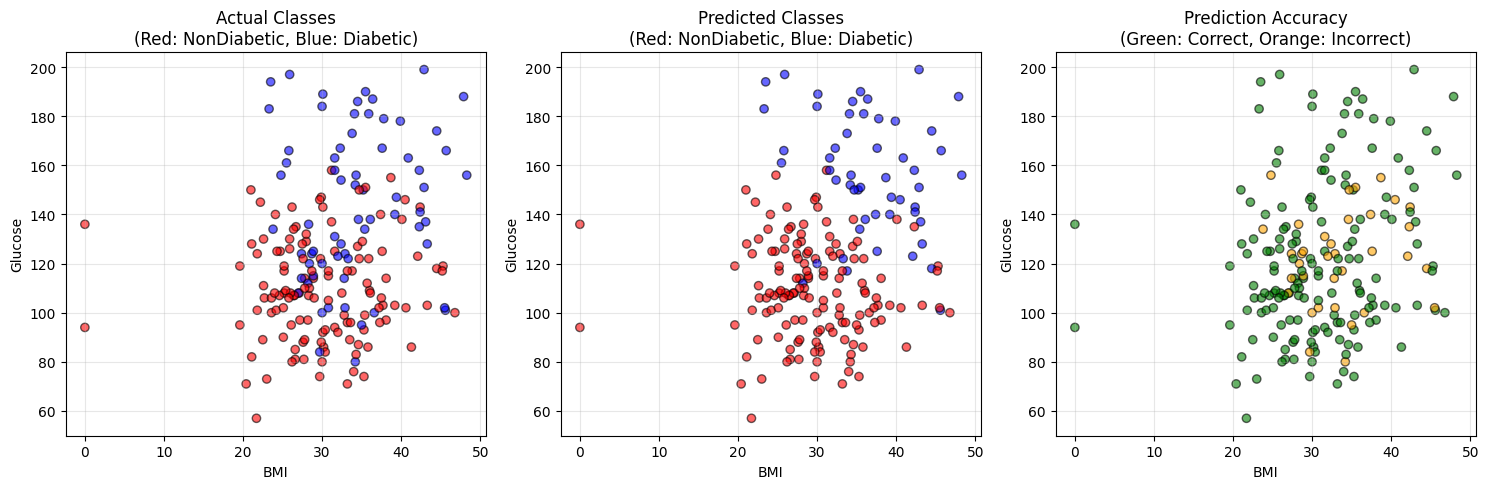

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define features to plot
v1 = 'BMI'
v2 = 'Glucose'

# Create figure with subplots
plt.figure(figsize=(15, 5))

# Plot 1: Actual Classes
plt.subplot(1, 3, 1)
colors_actual = ['red' if x == 0 else 'blue' for x in y_test]
plt.scatter(x_test[v1], x_test[v2], c=colors_actual, edgecolors='k', alpha=0.6)
plt.xlabel(v1, fontsize=10)
plt.ylabel(v2, fontsize=10)
plt.title('Actual Classes\n(Red: NonDiabetic, Blue: Diabetic)', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 2: Predicted Classes
plt.subplot(1, 3, 2)
colors_pred = ['red' if x == 0 else 'blue' for x in y_pred]  # Fixed: Use y_pred instead of colors
plt.scatter(x_test[v1], x_test[v2], c=colors_pred, edgecolors='k', alpha=0.6)
plt.xlabel(v1, fontsize=10)
plt.ylabel(v2, fontsize=10)
plt.title('Predicted Classes\n(Red: NonDiabetic, Blue: Diabetic)', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 3: Correct vs Incorrect Predictions
plt.subplot(1, 3, 3)
correct = y_test == y_pred
colors_accuracy = ['green' if x else 'orange' for x in correct]
plt.scatter(x_test[v1], x_test[v2], c=colors_accuracy, edgecolors='k', alpha=0.6)
plt.xlabel(v1, fontsize=10)
plt.ylabel(v2, fontsize=10)
plt.title('Prediction Accuracy\n(Green: Correct, Orange: Incorrect)', fontsize=12)
plt.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [8]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

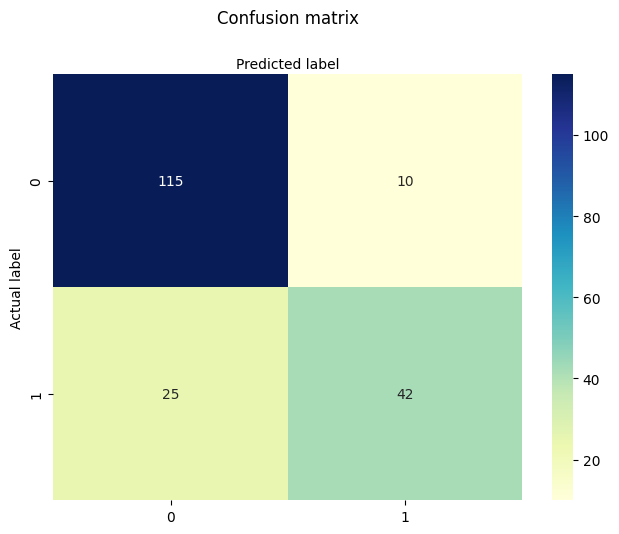

In [9]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192

